In [8]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import find_peaks
# from scipy.optimize import curve_fit

plt.style.use('seaborn-v0_8')
plt.rcParams['legend.framealpha'] = 1  ## disable any default legend frame transparency from the style

dirpath_data = Path('/home/lain/root/100_work/110_projects/111_mars/code-repos/redplanet/scrap/250408_modlab_nmr/exp_modern_phys_388/nmr/nmr_data')

zero-crossing-tau-0.034s
peak t [ms]: [0.08000172]
peak v [V]:  [2.3999999]


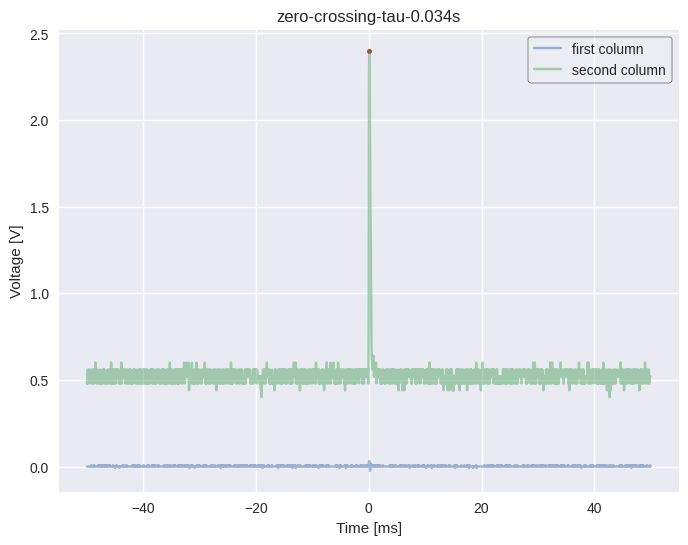

before-crossing-tau-0.0289s
peak t [ms]: [ 0.12000171 29.00000103]
peak v [V]:  [1.76      2.1599998]


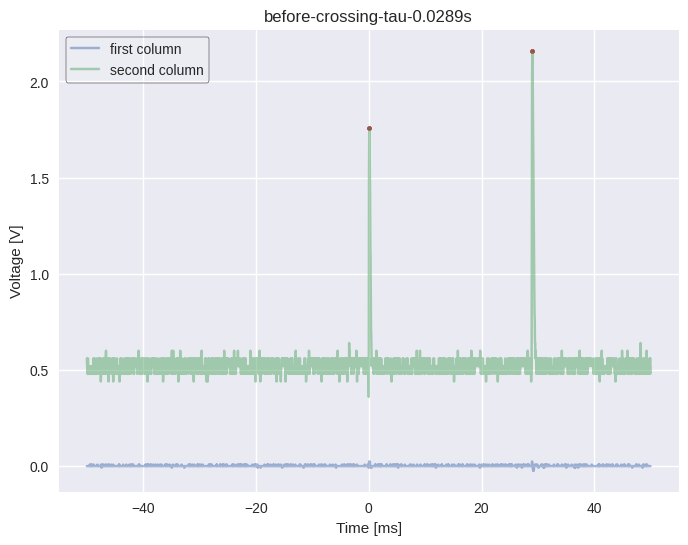

after-crossing-tau-0.040s
peak t [ms]: [29.80000153]
peak v [V]:  [2.79999995]


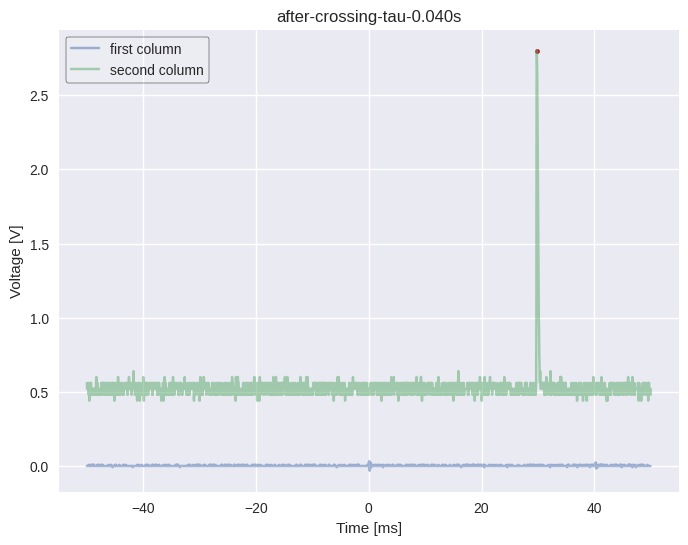

In [28]:
# --------------------------------- load data -------------------------------- #
fnames = [
    'zero-crossing/zero-crossing-tau-0.034s.csv',
    'zero-crossing/before-crossing-tau-0.0289s.csv',
    'zero-crossing/after-crossing-tau-0.040s.csv',
]


for fname in fnames:

    fpath = dirpath_data / fname

    print(f'{fpath.stem}')

    df = pd.read_csv(
        fpath,
        usecols = [3,4,9,10],
        header = None,
        names = ['t1', 'v1', 't2', 'v2'],
    )



    # ------------------------------- crop & scale ------------------------------- #
    # df = df[
    #     (df['t2'] > -0.00001) &
    #     (df['t2'] <  0.00001)
    # ]

    # df['v2'] -= 0.5

    # df['v1'] /= df['v1'].max()
    # df['v2'] /= df['v2'].max()



    # ---------------- convert to 1D numpy arrays for convenience ---------------- #
    # dat_t = df['t2'].to_numpy()
    # dat_v = df['v2'].to_numpy()



    # -------------------------------- find peaks -------------------------------- #
    idx_peaks, _ = find_peaks(
        df['v2'],
        height = 1.5,
    )
    print(f'peak t [ms]: {df["t2"][idx_peaks].values * 1e3}')
    print(f'peak v [V]:  {df["v2"][idx_peaks].values}')



    # ----------------------------------- plot ----------------------------------- #
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(
        df['t1'] * 1e3,
        df['v1'],
        label = 'first column',
        alpha = 0.5
    )

    ax.plot(
        df['t2'] * 1e3,
        df['v2'],
        label = 'second column',
        alpha = 0.5
    )

    ax.scatter(
        df['t2'][idx_peaks] * 1e3,
        df['v2'][idx_peaks],
        # label = 'peaks',
        color = 'firebrick',
        s = 10,
    )


    ax.set_xlabel('Time [ms]')
    ax.set_ylabel('Voltage [V]')
    ax.set_title(f'{fpath.stem}')


    legend = ax.legend(
        frameon=True,
    )
    frame = legend.get_frame()
    frame.set_alpha(None)  ## disable any rcParam alpha override
    frame.set_facecolor((1, 1, 1, 0.1))  ## set frame coloring to white with some transparency
    frame.set_edgecolor('black')

    plt.show()